# December SPY Analysis 

**2015-2023**

This simple analysis is a quick and dirty example of how we can pull in the SPY ticker data to look at the closing prices over the last several years. Do we see any trends we can expect in the last week of the year? Is it time to make a move or be cautious? 

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import tab20

In [16]:
sym = yf.Ticker("SPY")

In [17]:
years = range(2015, 2024)
bounds = [(str(yr)+"-12-01", str(yr)+"-12-31") for yr in years]
cols_to_drop = [
    "Open", "Dividends", "Stock Splits", "Capital Gains", "Volume"
]

dec = (sym.history(start=start, end=end) for start, end in bounds)
dec = pd.concat(dec)
dec = dec.sort_index()

dec = dec.drop(cols_to_drop, axis=1)
dec['Year'] = dec.index.year
dec['Day'] = dec.index.day

display(dec)

,High,Low,Close,Year,Day
Date,,,,,
2015-12-01 00:00:00-05:00,182.011949,180.535611,181.891068,2015,1
2015-12-02 00:00:00-05:00,182.167332,179.775843,180.034851,2015,2
2015-12-03 00:00:00-05:00,180.570132,176.771387,177.513870,2015,3
2015-12-04 00:00:00-05:00,181.278100,177.513883,180.975922,2015,4
2015-12-07 00:00:00-05:00,181.070873,178.886593,179.879456,2015,7
...,...,...,...,...,...
2023-12-18 00:00:00-05:00,472.980011,469.890015,471.970001,2023,18
2023-12-19 00:00:00-05:00,474.920013,472.450012,474.839996,2023,19
2023-12-20 00:00:00-05:00,475.899994,467.820007,468.260010,2023,20


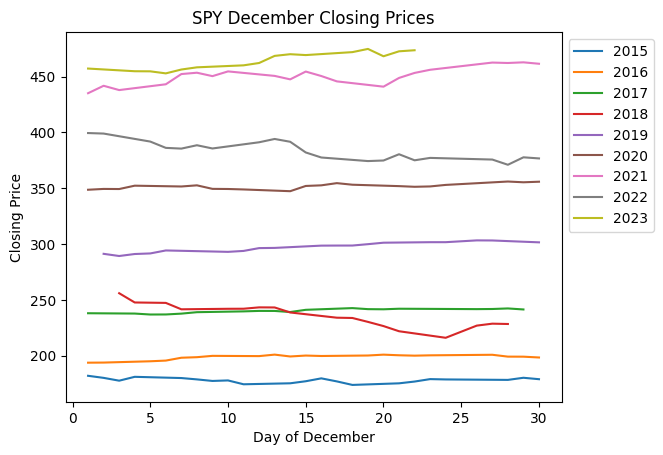

In [18]:
fig, ax = plt.subplots()
for year in years:
    data = dec[dec['Year'] == year]
    ax.plot(data['Day'], data['Close'], label=year)


ax.set_xlabel('Day of December')
ax.set_ylabel('Closing Price')
ax.set_title('SPY December Closing Prices')
ax.legend(bbox_to_anchor=(1.2, 1))
#ax.legend(title='Year')

plt.show()